In [31]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib.inline

# Denoising

In [32]:
image = cv2.imread("./dataset/gajah/Gajah_001.jpg",flags=cv2.IMREAD_COLOR) 

rgb_image = cv2.cvtColor(image,code=cv2.COLOR_BGR2RGB)
r,g,b = cv2.split(rgb_image)
rg = cv2.merge(r,g)

hsv = cv2.cvtColor(image,code=cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(hsv)

noisereduced = cv2.fastNlMeansDenoisingColored(rgb_image,None,32,32,7,21)


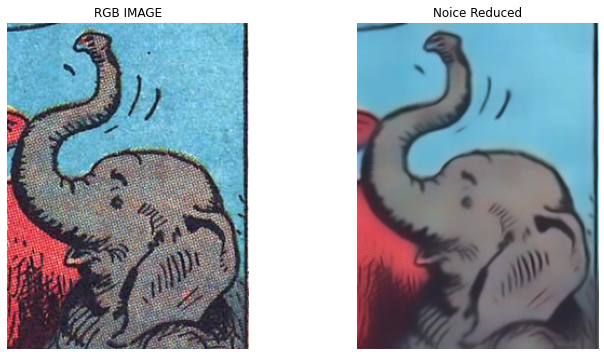

In [33]:
fig = plt.figure(figsize=(24, 6))
# setting values to rows and column variables
columns = 4
rows = 1

fig.add_subplot(rows,columns,1)
plt.axis(False)
plt.title("RGB IMAGE")
plt.imshow(rgb_image)


fig.add_subplot(rows,columns,2)
plt.axis(False)
plt.title("Noice Reduced")
plt.imshow(noisereduced)

# Gaussian Blur (Blurred)

In [34]:
blur = cv2.GaussianBlur(noisereduced,(5,5),10)

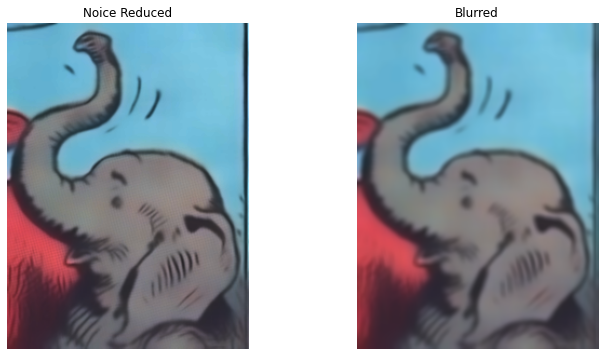

In [35]:
fig = plt.figure(figsize=(24, 6))
# setting values to rows and column variables
rows = 1
columns = 4

fig.add_subplot(rows,columns,1)
plt.axis(False)
plt.title("Noice Reduced")
plt.imshow(noisereduced)

fig.add_subplot(rows,columns,2)
plt.axis(False)
plt.title("Blurred")
plt.imshow(blur)


# Dilate

In [45]:
kernel = np.ones((3, 3), 'uint8')
img_dilate = cv2.dilate(noisereduced, kernel, iterations=5)

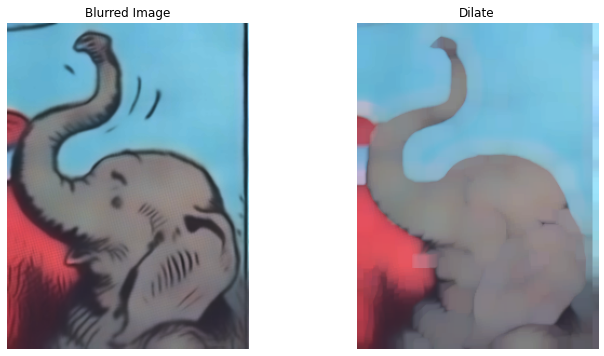

In [46]:
fig = plt.figure(figsize=(24, 6))
# setting values to rows and column variables
rows = 1
columns = 4

fig.add_subplot(rows,columns,1)
plt.axis(False)
plt.title("Blurred Image")
plt.imshow(noisereduced)


fig.add_subplot(rows,columns,2)
plt.axis(False)
plt.title("Dilate")
plt.imshow(img_dilate)

# Erode

In [47]:
kernel = np.ones((3, 3), 'uint8')
img_erosion = cv2.erode(blur, kernel, iterations=15)

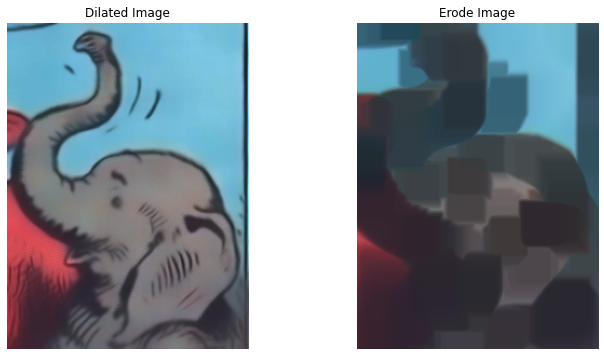

In [48]:
fig = plt.figure(figsize=(24, 6))
# setting values to rows and column variables
rows = 1
columns = 4

fig.add_subplot(rows,columns,1)
plt.axis(False)
plt.title("Dilated Image")
plt.imshow(noisereduced)


fig.add_subplot(rows,columns,2)
plt.axis(False)
plt.title("Erode Image")
plt.imshow(img_erosion)

# To Binary

In [40]:
grayscale = cv2.cvtColor(img_erosion,cv2.COLOR_RGB2GRAY)
(thresh, blackAndWhiteImage) = cv2.threshold(grayscale, 127, 255, cv2.THRESH_BINARY)


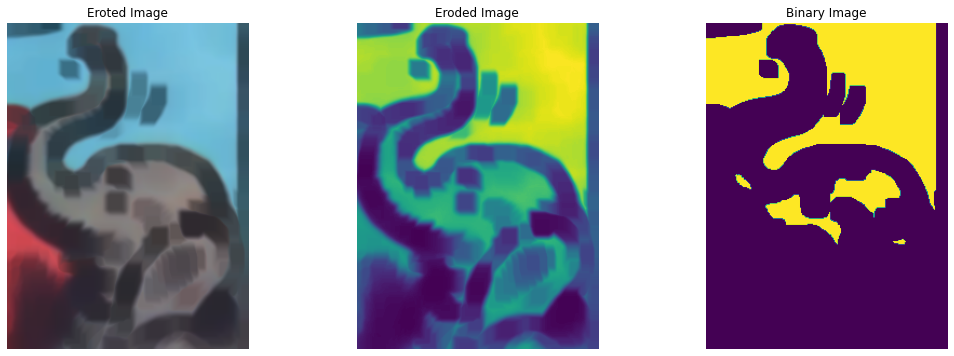

In [41]:
fig = plt.figure(figsize=(24, 6))
# setting values to rows and column variables
rows = 1
columns = 4

fig.add_subplot(rows,columns,1)
plt.axis(False)
plt.title("Eroted Image")
plt.imshow(img_erosion)


fig.add_subplot(rows,columns,2)
plt.axis(False)
plt.title("Eroded Image")
plt.imshow(grayscale)

fig.add_subplot(rows,columns,3)
plt.axis(False)
plt.title("Binary Image")
plt.imshow(blackAndWhiteImage)

# Edge Detection

In [42]:
edges = cv2.Canny(img_erosion,50,200)

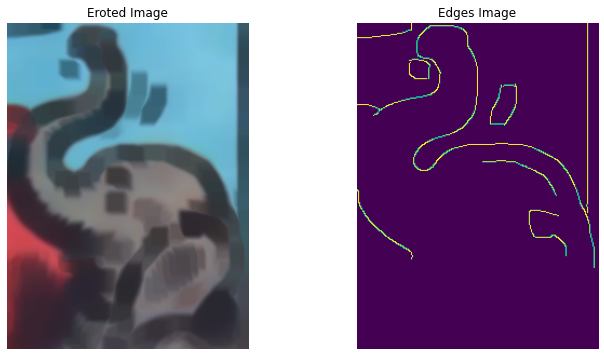

In [43]:
fig = plt.figure(figsize=(24, 6))
# setting values to rows and column variables
rows = 1
columns = 4

fig.add_subplot(rows,columns,1)
plt.axis(False)
plt.title("Eroted Image")
plt.imshow(img_erosion)


fig.add_subplot(rows,columns,2)
plt.axis(False)
plt.title("Edges Image")
plt.imshow(edges)